# customer segmentataion using K means clustering


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### import the dataset

In [2]:
df= pd.read_csv('data/Mall_Customers.csv',index_col=0,header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

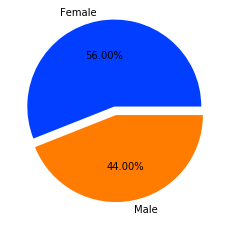

In [4]:
# declaring data
data = [112,88]
keys = ['Female', 'Male']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')[0:5]
explode=[0.1,0]
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,explode=explode, autopct='%.2f%%')
  
# displaying chart
plt.show()

here we can see that there are more females in mall 
there are less men in mall
the percentage difference however is not much as to speak

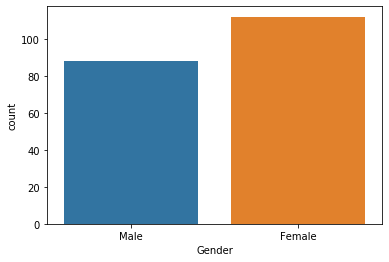

In [5]:
sns.countplot(x='Gender',data=df)
plt.show()

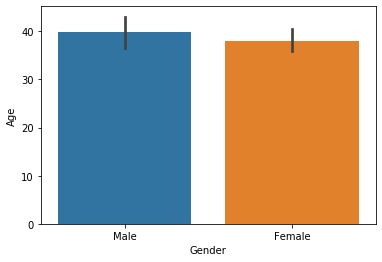

In [6]:
sns.barplot(x="Gender", y="Age", data=df)
plt.show()

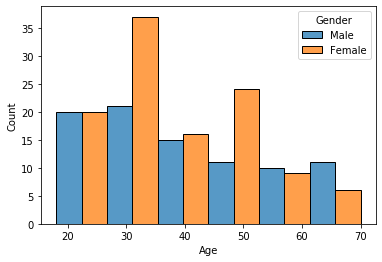

In [7]:
import seaborn as sns
sns.histplot(data=df,x='Age',hue="Gender",bins=6,multiple='dodge')
plt.show()

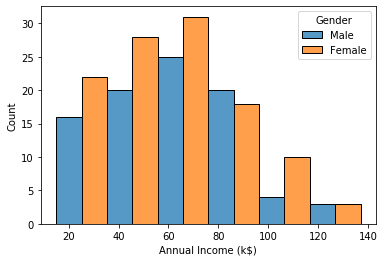

In [8]:
import seaborn as sns
sns.histplot(data=df,x='Annual Income (k$)',hue="Gender",bins=6,multiple='dodge')
plt.show()

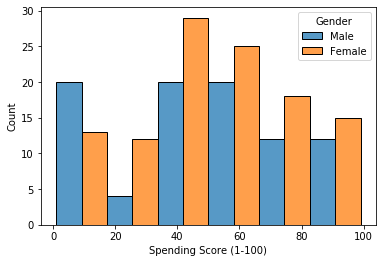

In [9]:
import seaborn as sns
sns.histplot(data=df,x='Spending Score (1-100)',hue="Gender",bins=6,multiple='dodge')
plt.show()

In [10]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.9+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [12]:
df.columns


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

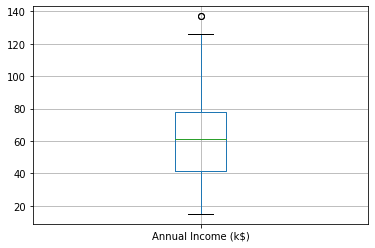

In [13]:
df.boxplot("Annual Income (k$)")
plt.show()

In [14]:
X = df.iloc[:,2:4] #[start_row : stop_row,start_row:stop_row]
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [15]:
%%time

#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX=6

wsse=[]

#progress bar
with tqdm(total=K_MAX-1) as pbar:
    for i in range(1,K_MAX):
        kmeans=KMeans(n_clusters=i,random_state=10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)


Wall time: 727 ms


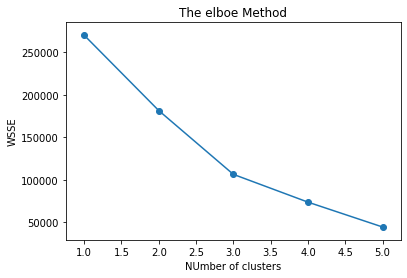

In [16]:
plt.plot(range(1,K_MAX), wsse)
plt.scatter(range(1,K_MAX), wsse)
plt.title('The elboe Method')
plt.xlabel('NUmber of clusters')
plt.ylabel('WSSE')
plt.show()

In [17]:
kmeans= KMeans(n_clusters=5,random_state=10)
y_pred=kmeans.fit_predict(X)

In [18]:
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [19]:
kmeans.n_iter_

5

In [20]:
df["Clusters"]=y_pred
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3


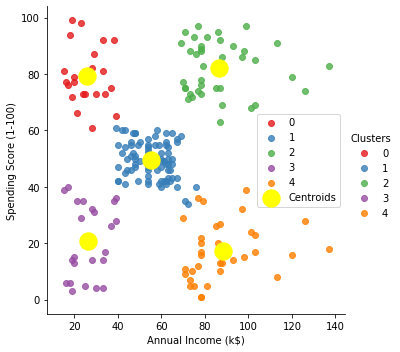

In [21]:
# Assuming df is your DataFrame and kmeans is your KMeans model
sns.lmplot(data=df,
          x='Annual Income (k$)',
          y='Spending Score (1-100)',
          fit_reg=False, # no regression line
          hue='Clusters',
          palette='Set1')

# Corrected attribute name
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=300, c='yellow', label='Centroids')
plt.legend()
plt.show()
